# Visualização de Dados em Python com Matplotlib

Essa etapa do ddesenvolvimento iremos explorar a parte grafica dos dados, podendo comunicar achados e validar hipoteses em sua grande maioria por meio de graficos no python.

# Anatomia do matplotlib e APIs de uso

- Figure: a “tela” ou canvas. Pode conter uma ou várias áreas de plotagem (Axes).
- Axes: onde o gráfico é desenhado (eixo X/Y, ticks, rótulos, grade, título).
- Duas formas de uso:
    1. API de estado (procedural): `import matplotlib.pyplot as plt` e usar `plt.plot(...)`, `plt.title(...)`, etc. É rápida para gráficos simples.
    2. API orientada a objetos (OO): `fig, ax = plt.subplots()` e então `ax.plot(...)`, `ax.set_title(...)`. Dá controle fino e é ideal para múltiplos subplots ou gráficos complexos.

Boas práticas iniciais:

- Preferir OO quando você tiver mais de um gráfico na mesma figura ou precisar de personalizações extensas.
- Usar `fig.tight_layout()` ou `constrained_layout=True` para evitar cortes de rótulos.
- Separar preparação dos dados e plotagem (código mais claro e reaproveitável).

# Personalização essencial

## Títulos, rótulos, legendas e grade

- `ax.set_title("…")`, `ax.set_xlabel("…")`, `ax.set_ylabel("…")`.
- `ax.legend()` quando houver múltiplas séries com `label='...'`.
- `ax.grid(True, linestyle='--', alpha=0.4)` para leitura de valores.

## Estilos, cores e marcadores

- Linhas: `linestyle='--'`, `linewidth=2`; marcadores: `marker='o'`, `markerfacecolor` etc.
- Paletas/colormaps: `viridis`, `plasma`, `inferno`, `cividis` (boa para daltônicos).
- Evite usar apenas cor para codificar categorias (use marcadores, rótulos).

## Escalas e limites

- `ax.set_xscale('log')` / `ax.set_yscale('log')` quando a distribuição for log-normal ou houver várias ordens de grandeza.
- `ax.set_xlim(min, max)` / `ax.set_ylim(min, max)` para focar a região relevante.

## Anotações e destaques

- `ax.annotate('pico', xy=(x0, y0), xytext=(x0+1, y0+5), arrowprops=dict(arrowstyle='->'))` para apontar eventos.
- `ax.axvline(...)`, `ax.axhline(...)`, `ax.axvspan(...)`, `ax.axhspan(...)` para linhas/regiões de referência.

## Layout e múltiplos subplots

- `fig, axs = plt.subplots(nrows, ncols, figsize=(... ), constrained_layout=True)`.
- `fig.tight_layout()` para ajustar espaçamentos.

## Exportação com qualidade

- `fig.savefig('arquivo.png', dpi=300, bbox_inches='tight', transparent=False)`
- Formatos: `.png` (raster), `.pdf`/`.svg` (vetorial, ideal para impressão).

# Gráficos principais: quando usar, passos e código

Atenção: todos os exemplos abaixo podem ser colados e executados. Ao final, há um script completo com funções para cada gráfico e um main().

## 1. Gráfico de Linha (line plot)


Quando usar

- Séries temporais, evolução de métricas ao longo do tempo, tendências e comparações de linhas (ex.: visitas por dia, consumo por hora).

Passos essenciais

- Ordenar por tempo (se aplicável), nomear eixos com unidades, considerar suavização apenas se fizer sentido analítico.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def grafico_linha():
    dias = np.arange(1, 11)
    vendas = np.array([12, 15, 14, 18, 22, 21, 23, 19, 25, 28])

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(dias, vendas, marker='o', linewidth=2)
    ax.set_title('Vendas por Dia')
    ax.set_xlabel('Dia')
    ax.set_ylabel('Quantidade')
    ax.grid(True, linestyle='--', alpha=0.5)
    fig.tight_layout()
    plt.show()

# 2. Barras (simples, agrupadas, empilhadas, horizontal)

Quando usar

- Comparações entre categorias.
- Agrupadas: comparar subcategorias lado a lado (ex.: vendas por produto em 2 lojas).
- Empilhadas: enfatizar o total e a composição (proporção).
- Horizontal: útil quando rótulos de categoria são longos.

## Barras simples

In [3]:
def barras_simples():
    categorias = ['A', 'B', 'C', 'D']
    valores = [23, 17, 35, 29]

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(categorias, valores)
    ax.set_title('Barras Simples')
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Valor')
    for i, v in enumerate(valores):
        ax.text(i, v + 0.5, str(v), ha='center')
    fig.tight_layout()
    plt.show()

## Barras Agrupadas

In [4]:
def barras_agrupadas():
    categorias = ['Q1', 'Q2', 'Q3', 'Q4']
    loja1 = [15, 18, 20, 22]
    loja2 = [12, 14, 21, 19]

    x = np.arange(len(categorias))
    largura = 0.35

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(x - largura/2, loja1, largura, label='Loja 1')
    ax.bar(x + largura/2, loja2, largura, label='Loja 2')
    ax.set_title('Barras Agrupadas')
    ax.set_xticks(x, categorias)
    ax.set_ylabel('Vendas')
    ax.legend()
    fig.tight_layout()
    plt.show()

## Barras empilhadas

In [5]:
def barras_empilhadas():
    categorias = ['Serviços', 'Produtos', 'Assinaturas']
    base = [30, 40, 20]
    adicional = [10, 15, 5]

    x = np.arange(len(categorias))

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(x, base, label='Base')
    ax.bar(x, adicional, bottom=base, label='Adicional')
    ax.set_title('Barras Empilhadas')
    ax.set_xticks(x, categorias)
    ax.set_ylabel('Receita')
    ax.legend()
    fig.tight_layout()
    plt.show()

## Barras horizontais

In [1]:
def barras_horizontais():
    linguagens = ['Python', 'Java', 'C#', 'JavaScript']
    vagas = [120, 100, 80, 150]

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.barh(linguagens, vagas)
    ax.set_title('Vagas por Linguagem (Horizontal)')
    ax.set_xlabel('Quantidade de Vagas')
    fig.tight_layout()
    plt.show()


5

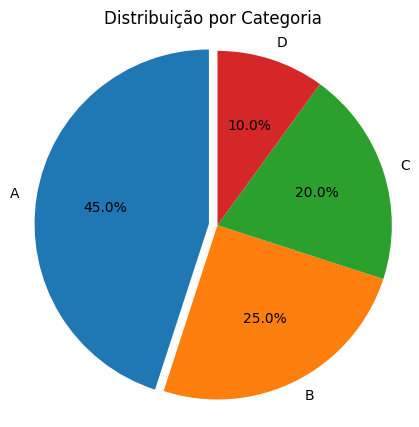

In [ ]:
def grafico_pizza():
    categorias = ['A', 'B', 'C', 'D']
    valores = [45, 25, 20, 10]
    explode = [0.05, 0, 0, 0]

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, explode=explode)
    ax.set_title('Distribuição por Categoria')
    ax.axis('equal')  # pizza “redonda”
    plt.show()

Algoritmo de escolha

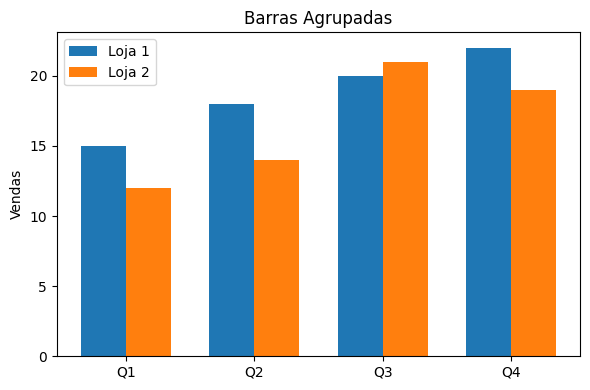

In [14]:
opcao = int(input("escolha: "))

match opcao:
    case 1:
        grafico_linha()
    case 2:
        barras_simples()
    case 3:
        barras_agrupadas()
    case 4:
        barras_empilhadas()
    case 5:
        grafico_pizza()


[ 1  2  3  4  5  6  7  8  9 10]
[17  8  6 20  7 30  9  6 10  3]


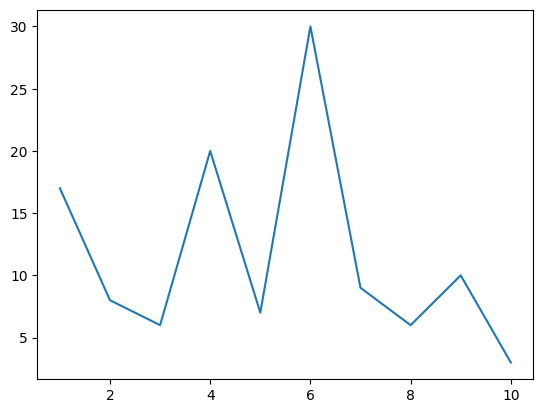

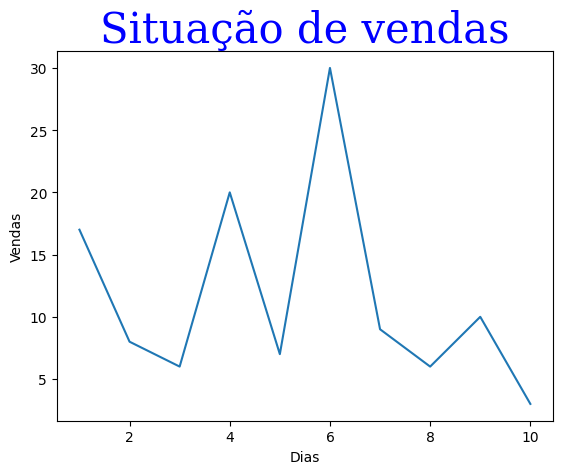

[ 20  47  30 120]


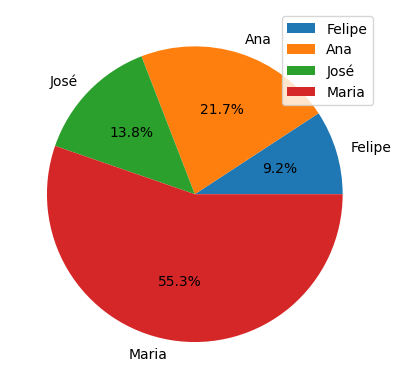

In [8]:
import matplotlib.pyplot as plt
import numpy as np


dias = np.arange(1,11)
print(dias)
vendas = np.array([17,8,6,20,7,30,9,6,10,3]);
print(vendas)
plt.plot(dias,vendas)
plt.show()

plt.plot(dias,vendas)

font = {'family':'serif', 'color':'blue', 'size': 30}

plt.title("Situação de vendas", fontdict= font)
plt.xlabel("Dias")
plt.ylabel("Vendas")

plt.show()

#Pizza
vendas = np.array([20,47,30,120])
print(vendas)

rotulos = ['Felipe','Ana','José','Maria']
plt.pie(vendas, labels=rotulos, autopct= '%1.1f%%')
plt.legend(rotulos)

plt.show()